In [47]:
import numpy as np
import statsmodels.api as sm
import linearmodels.iv.model as lm
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Data-GP1-1.csv')

# Data exploration and examination

In [3]:
df

,Mon,Tue,Wed,Thu,Date,Stormy,Mixed,p,q,Rainy,Cold,Wind
0,1,0,0,0,911202,1,0,-0.430783,8.994421,1,0,2.995732
1,0,1,0,0,911203,1,0,0.000000,7.707063,0,0,2.995732
2,0,0,1,0,911204,0,1,0.072321,8.350194,1,1,2.813411
3,0,0,0,1,911205,1,0,0.247139,8.656955,0,1,3.036554
4,0,0,0,0,911206,1,0,0.664327,7.844241,0,1,3.036554
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,0,920504,0,0,-0.798508,8.610683,0,0,2.862201
107,0,1,0,0,920505,0,1,-0.087011,7.162397,0,0,2.908721
108,0,0,1,0,920506,0,1,0.184922,7.362010,0,0,2.862201
109,0,0,0,1,920507,0,1,0.223143,8.764053,0,0,2.813411


In [4]:
df.describe()

,Mon,Tue,Wed,Thu,Date,Stormy,Mixed,p,q,Rainy,Cold,Wind
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.189189,0.207207,0.189189,0.207207,918566.675676,0.288288,0.306306,-0.193681,8.523430,0.162162,0.504505,2.862695
std,0.393435,0.407143,0.393435,0.407143,3568.817767,0.455020,0.463049,0.381935,0.741672,0.370271,0.502247,0.208632
min,0.000000,0.000000,0.000000,0.000000,911202.000000,0.000000,0.000000,-1.107745,6.194406,0.000000,0.000000,2.456736
25%,0.000000,0.000000,0.000000,0.000000,920111.500000,0.000000,0.000000,-0.479651,8.147429,0.000000,0.000000,2.708050
50%,0.000000,0.000000,0.000000,0.000000,920220.000000,0.000000,0.000000,-0.206514,8.621193,0.000000,1.000000,2.862201
75%,0.000000,0.000000,0.000000,0.000000,920330.500000,1.000000,1.000000,0.163000,9.035391,0.000000,1.000000,2.995732
max,1.000000,1.000000,1.000000,1.000000,920508.000000,1.000000,1.000000,0.664327,9.981374,1.000000,1.000000,3.401197


1 21
2 23
3 21
4 23
5 23


<BarContainer object of 5 artists>

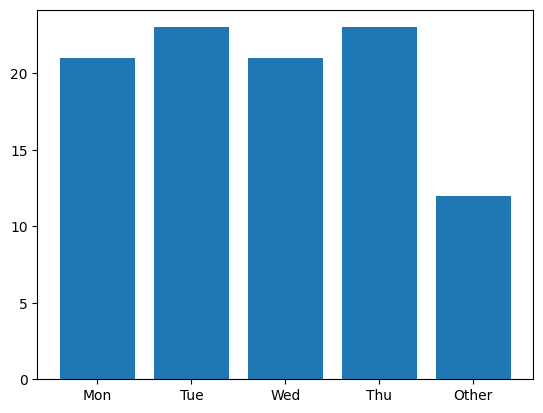

In [61]:
# distribution of days
other_days = 111
for i in range(4):
    x = sum(df.iloc[:, i])
    print(i+1, x)
    other_days -= x
print(5, other_days)
plt.bar(['Mon','Tue','Wed','Thu','Other'],[21,23,21,23,12])

In [14]:
# distribution of stormy/mixed
other_weather = 100
storm = df['Stormy'].sum()
mix = df['Mixed'].sum()
print(storm, mix, other_weather-storm-mix)

32 34 34


In [16]:
# distribution of stormy/mixed
other_weather = 100
rainy = df['Rainy'].sum()
cold = df['Cold'].sum()
print(rainy, 100- rainy)
print(cold, 100-cold)

18 82
56 44


<Axes: >

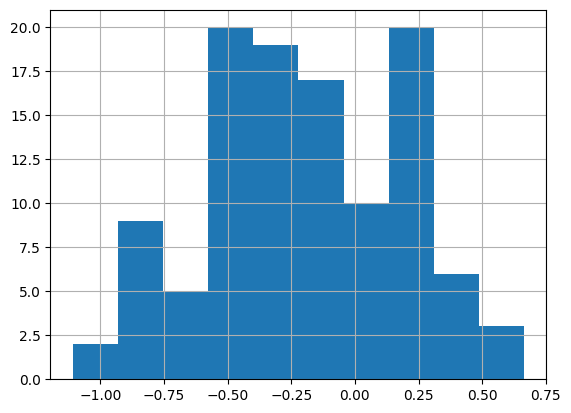

In [17]:
# distribution of p
df['p'].hist()

<Axes: >

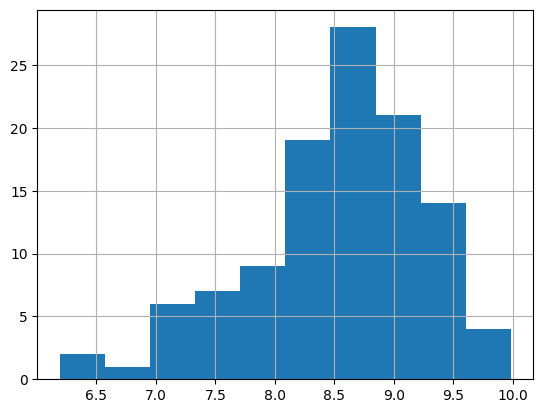

In [18]:
# distribution of q
df['q'].hist()

<Axes: >

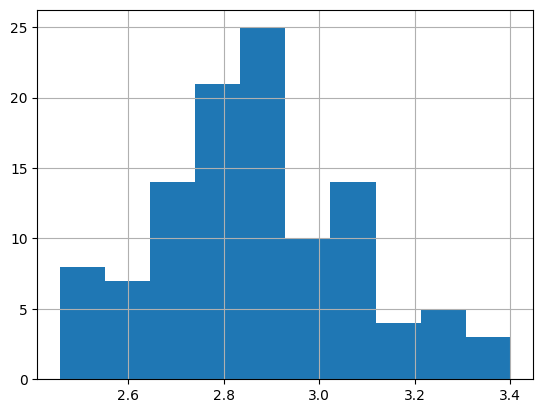

In [44]:
# distribution of wind
df['Wind'].hist()

In [54]:
#corr coeffiicents
df[['q', 'p', 'Rainy', 'Cold', 'Wind']].corr()

# ideally we will select IVs that are correlated to p but not q

,q,p,Rainy,Cold,Wind
q,1.000000,-0.278530,0.033979,-0.142820,-0.263995
p,-0.278530,1.000000,0.036653,0.241886,0.405123
Rainy,0.033979,0.036653,1.000000,0.093805,0.065632
Cold,-0.142820,0.241886,0.093805,1.000000,0.450201
Wind,-0.263995,0.405123,0.065632,0.450201,1.000000


# Naive model OLS

### Use of q = a + b*p + e

In [19]:
# extract cols p and q
p = df['p']
q = df['q']

In [23]:
naive_OLS = sm.OLS(q,p).fit()
naive_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      q   R-squared (uncentered):                   0.224
Model:                            OLS   Adj. R-squared (uncentered):              0.217
Method:                 Least Squares   F-statistic:                              31.81
Date:                Thu, 14 Sep 2023   Prob (F-statistic):                    1.33e-07
Time:                        13:46:34   Log-Likelihood:                         -381.67
No. Observations:                 111   AIC:                                      765.3
Df Residuals:                     110   BIC:                                      768.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
p             -9.4963      1.684     -5.640      0.000     -12.833      -6.160
==============================================================================
Omnibus:                        1.309   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                1.183
Skew:                          -0.089   Prob(JB):                        0.553
Kurtosis:                       2.526   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a naive model, simple OLS gives beta_1 = -9.4963, p val = 0.000.
However we assume that due to endogenity, beta_1 estimate is biased.

# 1st model, using day of the week as IVs

### p = a + bp + d_1 Mon + d_2 Tue + d_3 Wed + d_4 Thu + d_5 Other_day

In [29]:
# # edit dataframe to include column for other days 
# df_friday = df

# df_friday.loc[df_friday['Mon'] == 0 & 
#                df_friday['Tue'] == 0 &
#                df_friday['Wed'] == 0 &
#                df_friday['Thu'] == 0
#         , 'other_days'] = 1

# df_friday

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# 2nd model
### IV: wind
### Structural: q = a + b_1 p + b_2 date + e
### Reduced: p = a + d_1 date + d_2 wind + e

In [55]:
# create cols for date
date = df['Date']
wind = df['Wind']

In [56]:
# First stage
X = sm.add_constant(np.column_stack((date, wind)))
model_first_stage = sm.OLS(p, X).fit()
p_hat = model_first_stage.predict(X)
model_first_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     12.96
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           9.03e-06
Time:                        14:43:15   Log-Likelihood:                -38.224
No. Observations:                 111   AIC:                             82.45
Df Residuals:                     108   BIC:                             90.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0163      8.745      1.717      0.089      -2.318      32.350
x1         -1.868e-05   9.41e-06     -1.985      0.050   -3.73e-05   -2.42e-08
x2             0.6819      0.161      4.235      0.000       0.363       1.001
==============================================================================
Omnibus:                        0.425   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.585
Skew:                          -0.091   Prob(JB):                        0.747
Kurtosis:                       2.695   Cond. No.                     2.44e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Joint p value is samller than 0.05, hence jointly significant.
Addiitonally, IV wind < 0.05.

Justifies the use of p_hat insertion back into strucutral equation(?)

In [58]:
# Second stage
X_main = sm.add_constant(np.column_stack((p_hat, date)))
model_second_stage = sm.OLS(q, X_main).fit()
second_stage_coef = model_second_stage.params[2]
model_second_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.924
Date:                Thu, 14 Sep 2023   Prob (F-statistic):            0.00899
Time:                        14:44:16   Log-Likelihood:                -118.98
No. Observations:                 111   AIC:                             244.0
Df Residuals:                     108   BIC:                             252.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.7413     21.087      2.691      0.008      14.942      98.540
x1            -1.4929      0.489     -3.054      0.003      -2.462      -0.524
x2         -5.281e-05    2.3e-05     -2.295      0.024   -9.84e-05   -7.19e-06
==============================================================================
Omnibus:                        8.689   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.472
Skew:                          -0.596   Prob(JB):                       0.0145
Kurtosis:                       3.641   Cond. No.                     2.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P value from B_1 (paramter for price) is statistically signiicant.
Joint p value from second stage < 0.05, hence the estimate for b_1 is useful.

In [59]:
# check endogneity using wu hausman
mlr2 = lm.IV2SLS(dependent=q, exog=date, endog=p, instruments=wind).fit(cov_type="homoskedastic", debiased=True)
print(mlr2.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 2.6446
P-value: 0.1068
Distributed: F(1,108)


From hausman, shows that price is indeed exogenous as p >0.05

In [60]:
print(mlr2.sargan)

Invalid test statistic
Test requires more instruments than endogenous variables.
Sargan's test of overidentification
